<a href="https://colab.research.google.com/github/Ashvini-Gabhane/-AirBnb-Bookings-Analysis-Exploratory-Data-Analysis/blob/main/Excel_sheet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Reload the uploaded Excel file
file_path = '/content/drive/MyDrive/DOC-20241014-WA0046.xlsx'

# Load the data to check its contents and structure
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the structure of the Excel file
excel_data = pd.ExcelFile(file_path)



In [ ]:
data = pd.read_excel(file_path, sheet_name="Data")

In [ ]:
excel_data.sheet_names

['Summary',
 'Data',
 'Sheet1',
 'Sheet2',
 'Sheet3',
 'Sheet4',
 'sheet5',
 'sheet6',
 'sheet7']

In [ ]:
# Display the first few rows
print(data.head())

  CARRIER_NAME   INVOICE_NUMBER     TRACKING_NUMBER  BILL_DATE PICKUP_DATE  \
0          UPS  000000T331T5314  1ZXXXXXXXXXXXXXXX5 2024-08-03  2024-07-29   
1          UPS  000000T331T5314  1ZXXXXXXXXXXXXXXX5 2024-08-03  2024-07-25   
2          UPS  000000T331T5334  1ZXXXXXXXXXXXXXXX5 2024-08-17  2024-08-13   
3          UPS  000000T331T5354  1ZXXXXXXXXXXXXXXX5 2024-08-31  2024-08-28   
4          UPS  000000T331T5334  1ZXXXXXXXXXXXXXXX5 2024-08-17  2024-08-13   

  SENDER_POSTAL_CODE SENDER_STATE SENDER_CNTRY  CONSIGNEE_POSTAL_CODE  \
0              75056           TX           US                60657.0   
1              75056           TX           US                45327.0   
2              75056           TX           US                99202.0   
3              75056           TX           US                35803.0   
4              75056           TX           US                60076.0   

  CONSIGNEE_STATE  ... WIDTH HEIGHT  DIM_DIVISOR  NO_OF_PKGS TRACKING_STATUS  \
0           

<ipython-input-11-e3012c4c7085>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=carrier_perf, x="CARRIER_NAME", y="INCENTIVE_AMOUNT", palette="viridis")


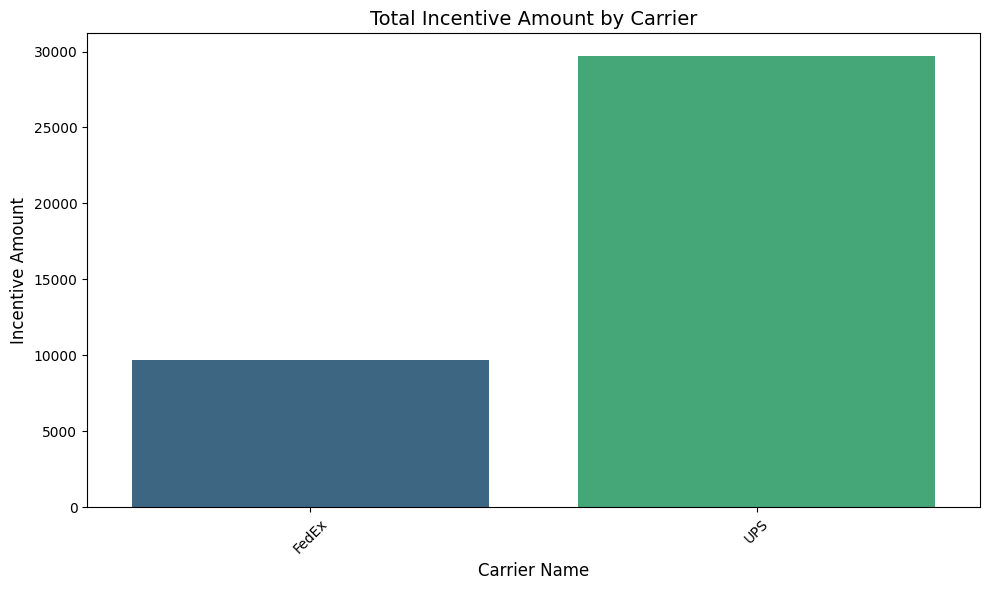

In [ ]:
# 1. Carrier Performance Analysis
carrier_perf = data.groupby("CARRIER_NAME")["INCENTIVE_AMOUNT"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=carrier_perf, x="CARRIER_NAME", y="INCENTIVE_AMOUNT", palette="viridis")
plt.title("Total Incentive Amount by Carrier", fontsize=14)
plt.xlabel("Carrier Name", fontsize=12)
plt.ylabel("Incentive Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-12-0657ef9a7a1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zone_trends, x="ZONE", y="NET_TRANSPORTATION_AMOUNT", palette="coolwarm")


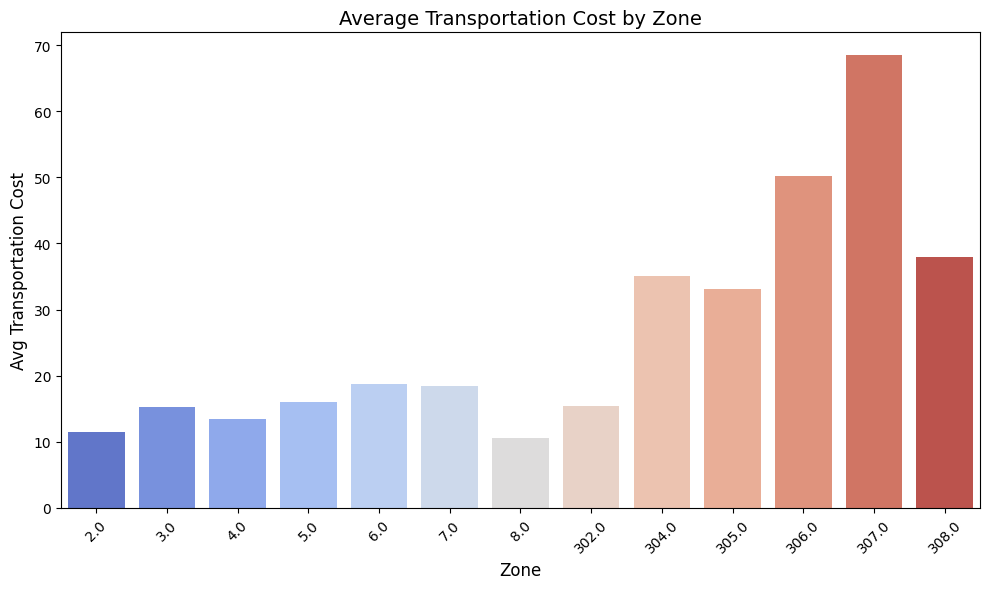

In [ ]:
# 2. Zone Trends
zone_trends = data.groupby("ZONE")["NET_TRANSPORTATION_AMOUNT"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=zone_trends, x="ZONE", y="NET_TRANSPORTATION_AMOUNT", palette="coolwarm")
plt.title("Average Transportation Cost by Zone", fontsize=14)
plt.xlabel("Zone", fontsize=12)
plt.ylabel("Avg Transportation Cost", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

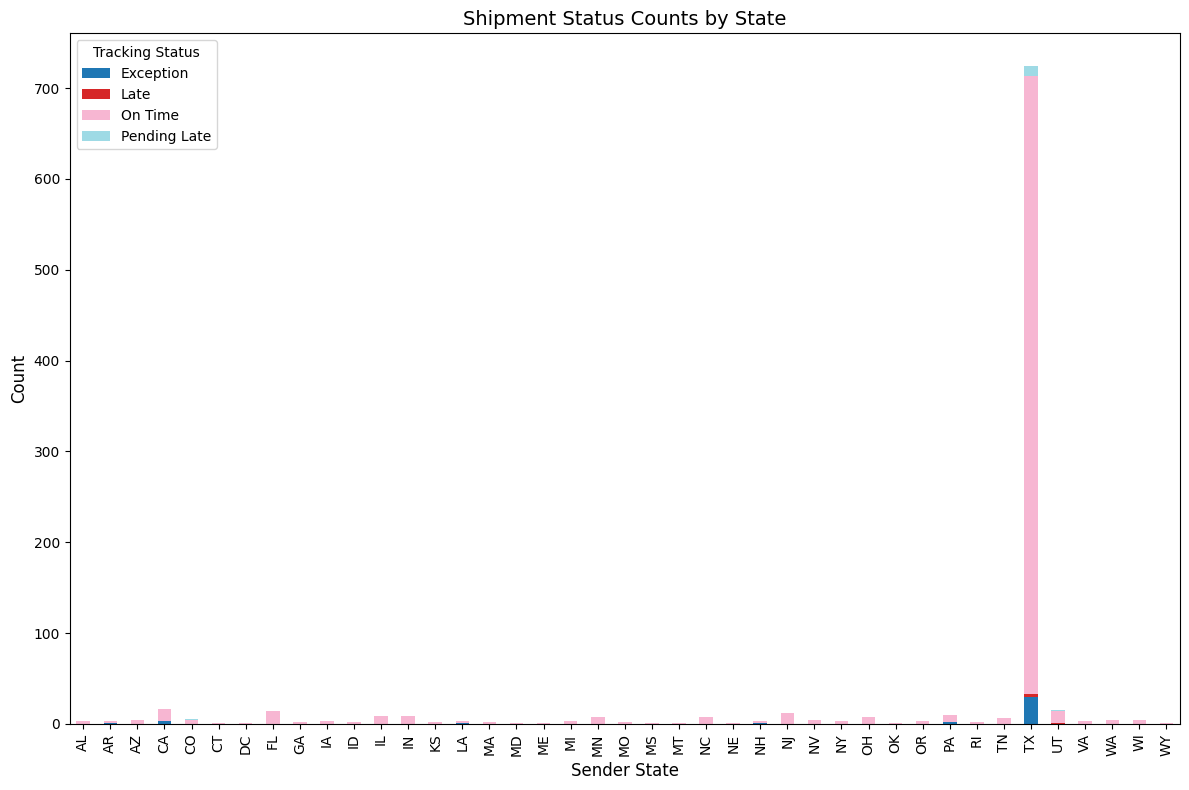

In [ ]:
# 3. Shipment Status Analysis
status_counts = data.groupby(["SENDER_STATE", "TRACKING_STATUS"]).size().unstack(fill_value=0)
status_counts.plot(kind="bar", stacked=True, figsize=(12, 8), colormap="tab20")
plt.title("Shipment Status Counts by State", fontsize=14)
plt.xlabel("Sender State", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Tracking Status")
plt.tight_layout()
plt.show()

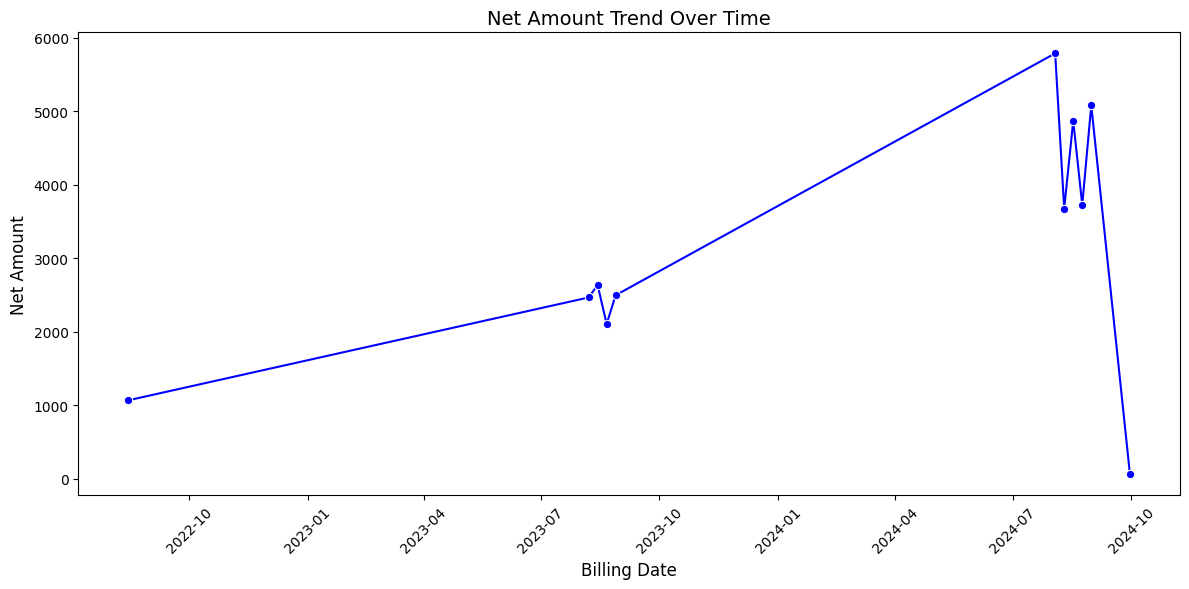

In [ ]:
# 4. Billing Trends
billing_trends = data.groupby("BILL_DATE")["NET_AMOUNT"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=billing_trends, x="BILL_DATE", y="NET_AMOUNT", marker="o", color="blue")
plt.title("Net Amount Trend Over Time", fontsize=14)
plt.xlabel("Billing Date", fontsize=12)
plt.ylabel("Net Amount", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()